In [91]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [49]:
data_dir = Path.cwd().parent / "Data"

contacts = data_dir / "Volunteer Augmented Data" / "Contacts_YW.csv"

df = pd.read_csv(contacts)

In [50]:
df = df.iloc[:, 2:]

In [51]:
cols = [
    "Speaks.English",
    "Speaks.Arabic",
    "Speaks.Amazigh",
    "Speaks.French",
    "Age",
    "Currently.Studying",
    "Current.Institution.Type",
    "X..of.Days.Since.Graduation",
    "Mailing.City",
    "MailingState",
    "Number.Days.Until.Job.Placement",
    "Retained.Job.as.of.last.Status.Check",
    "Continuously.Working",
    "X..Of.Days.Continuously.Working",
    "At.Grad.Job.Placement",
    "At.Grad.Placement.Data.Available",
    "X3.Month.Job.Placement",
    "X3.Month.Placement.Data.Available",
    "X6.Month.Job.Placement",
    "X6.Month.Placement.Data.Available",
    "X9.Month.Job.Placement",
    "X9.Month.Placement.Data.Available",
    "X12.Month.Job.Placement",
    "X12.Month.Placement.Data.Available",
    "X3.Month.Job.Retention",
    "X3.Month.Continuously.Working",
    "X3.Month.Post.Placement.Data.Avail.YES",
    "X6.Month.Job.Retention",
    "X6.Month.Continuously.Working",
    "X6.Month.Post.Placement.Data.Avail.YES",
    "X9.Month.Job.Retention",
    "X9.Month.Continuously.Working",
    "X9.Month.Post.Placement.Data.Avail.YES",
    "X12.Month.Job.Retention",
    "X12.Month.Continuously.Working",
    "X12.Month.Post.Placement.Data.Avail.YES",
    "Number.Family.Members",
    "Number.Family.Members.Working",
    "Monthly.Family.Income",
    "Job.Tenure.in.Months..First.",
    "First.Previous.Job.Salary",
    "Job.Tenure.in.Months..Second.",
    "Second.Previous.Job.Salary",
    "Job.Tenure.in.Months..Third.",
    "Third.Previous.Job.Salary",
    "Lives.in.IDP.camp.or.shelter.",
    "NumApps",
    "Grad170days",
    "Retain6mo",
    "working6mo",
    "CohortDK",
    "MailingState.1",
]


In [52]:
drop = [
    "Retained.Job.as.of.last.Status.Check",
    "Continuously.Working",
    "X..Of.Days.Continuously.Working",
    "X3.Month.Job.Retention",
    "X3.Month.Continuously.Working",
    "X3.Month.Post.Placement.Data.Avail.YES",
    "X6.Month.Job.Retention",
    "X6.Month.Continuously.Working",
    "X6.Month.Post.Placement.Data.Avail.YES",
    "X9.Month.Job.Retention",
    "X9.Month.Continuously.Working",
    "X9.Month.Post.Placement.Data.Avail.YES",
    "X12.Month.Job.Retention",
    "X12.Month.Continuously.Working",
    "X12.Month.Post.Placement.Data.Avail.YES",
    "Job.Tenure.in.Months..First.",
    "Job.Tenure.in.Months..Second.",
    "Job.Tenure.in.Months..Third.",
    "Retain6mo",
    "working6mo",
]


In [53]:
X = df.drop(drop, axis=1)

In [54]:
X = X.select_dtypes(np.number)

In [55]:
X = X.dropna(axis=1)

In [56]:
X = X.iloc[:, 2:]

In [57]:
X.isna().sum()

Speaks.Arabic                  0
Speaks.Amazigh                 0
Speaks.French                  0
Age                            0
Currently.Studying             0
X..of.Days.Since.Graduation    0
placement_grad                 0
placement_grad_data            0
placement_3                    0
placement_3_data               0
placement_6                    0
placement_6_data               0
placement_9                    0
placement_9_data               0
placement_12                   0
placement_12_data              0
NumApps                        0
Grad170days                    0
dtype: int64

In [58]:
df = pd.concat([X, df["Retain6mo"]], axis=1)

In [66]:
df = df.dropna()

In [67]:
df.head()

,Speaks.Arabic,Speaks.Amazigh,Speaks.French,Age,Currently.Studying,X..of.Days.Since.Graduation,placement_grad,placement_grad_data,placement_3,placement_3_data,placement_6,placement_6_data,placement_9,placement_9_data,placement_12,placement_12_data,NumApps,Grad170days,Retain6mo
0,1,0,1,22,0,517,1,1,1,1,1,1,1,1,1,1,1,1,0.0
1,1,0,1,29,0,278,1,1,1,1,1,1,1,1,1,1,1,1,1.0
2,1,0,1,26,0,516,1,1,1,1,1,1,1,1,1,1,1,1,0.0
3,1,0,0,23,0,595,0,1,0,1,1,1,1,1,1,1,1,1,0.0
4,1,0,1,26,0,278,1,1,1,1,1,1,1,1,1,1,1,1,1.0


In [68]:
df = df[df.columns.drop(list(df.filter(regex='^placement_')))]

In [75]:
df = df.drop("Currently.Studying", axis=1)

In [76]:
y = df["Retain6mo"]

In [77]:
X = df.drop("Retain6mo", axis=1)

In [78]:
log_reg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.657019
         Iterations 6


In [84]:
coefs = log_reg.summary().tables[1]

In [85]:
coefs

,coef,std err,z,P>|z|,[0.025,0.975]
Speaks.Arabic,-2.0612,0.311,-6.623,0.000,-2.671,-1.451
Speaks.Amazigh,-0.4078,0.222,-1.837,0.066,-0.843,0.027
Speaks.French,0.2382,0.085,2.789,0.005,0.071,0.406
Age,0.0248,0.008,3.056,0.002,0.009,0.041
X..of.Days.Since.Graduation,0.0030,0.000,9.626,0.000,0.002,0.004
NumApps,-0.2610,0.197,-1.323,0.186,-0.648,0.126
Grad170days,0.2899,0.280,1.036,0.300,-0.259,0.838


In [108]:
def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of 
    the coefficients with 95% confidence intervals.
    
    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary 
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    
    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(10, 15))
    
    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=22, 
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)
    
    # Set title & labels
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)
    
    # Coefficients
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               y=coef_df['coef'], color='steelblue')
    
    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    plt.yticks(rotation=90)
    plt.tight_layout()
    plt.savefig("coef.jpg")
    
    return plt.show()

/var/folders/dc/gzld3hs1359b7q438xzlplkw0000gn/T/ipykernel_61193/944356908.py:59: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


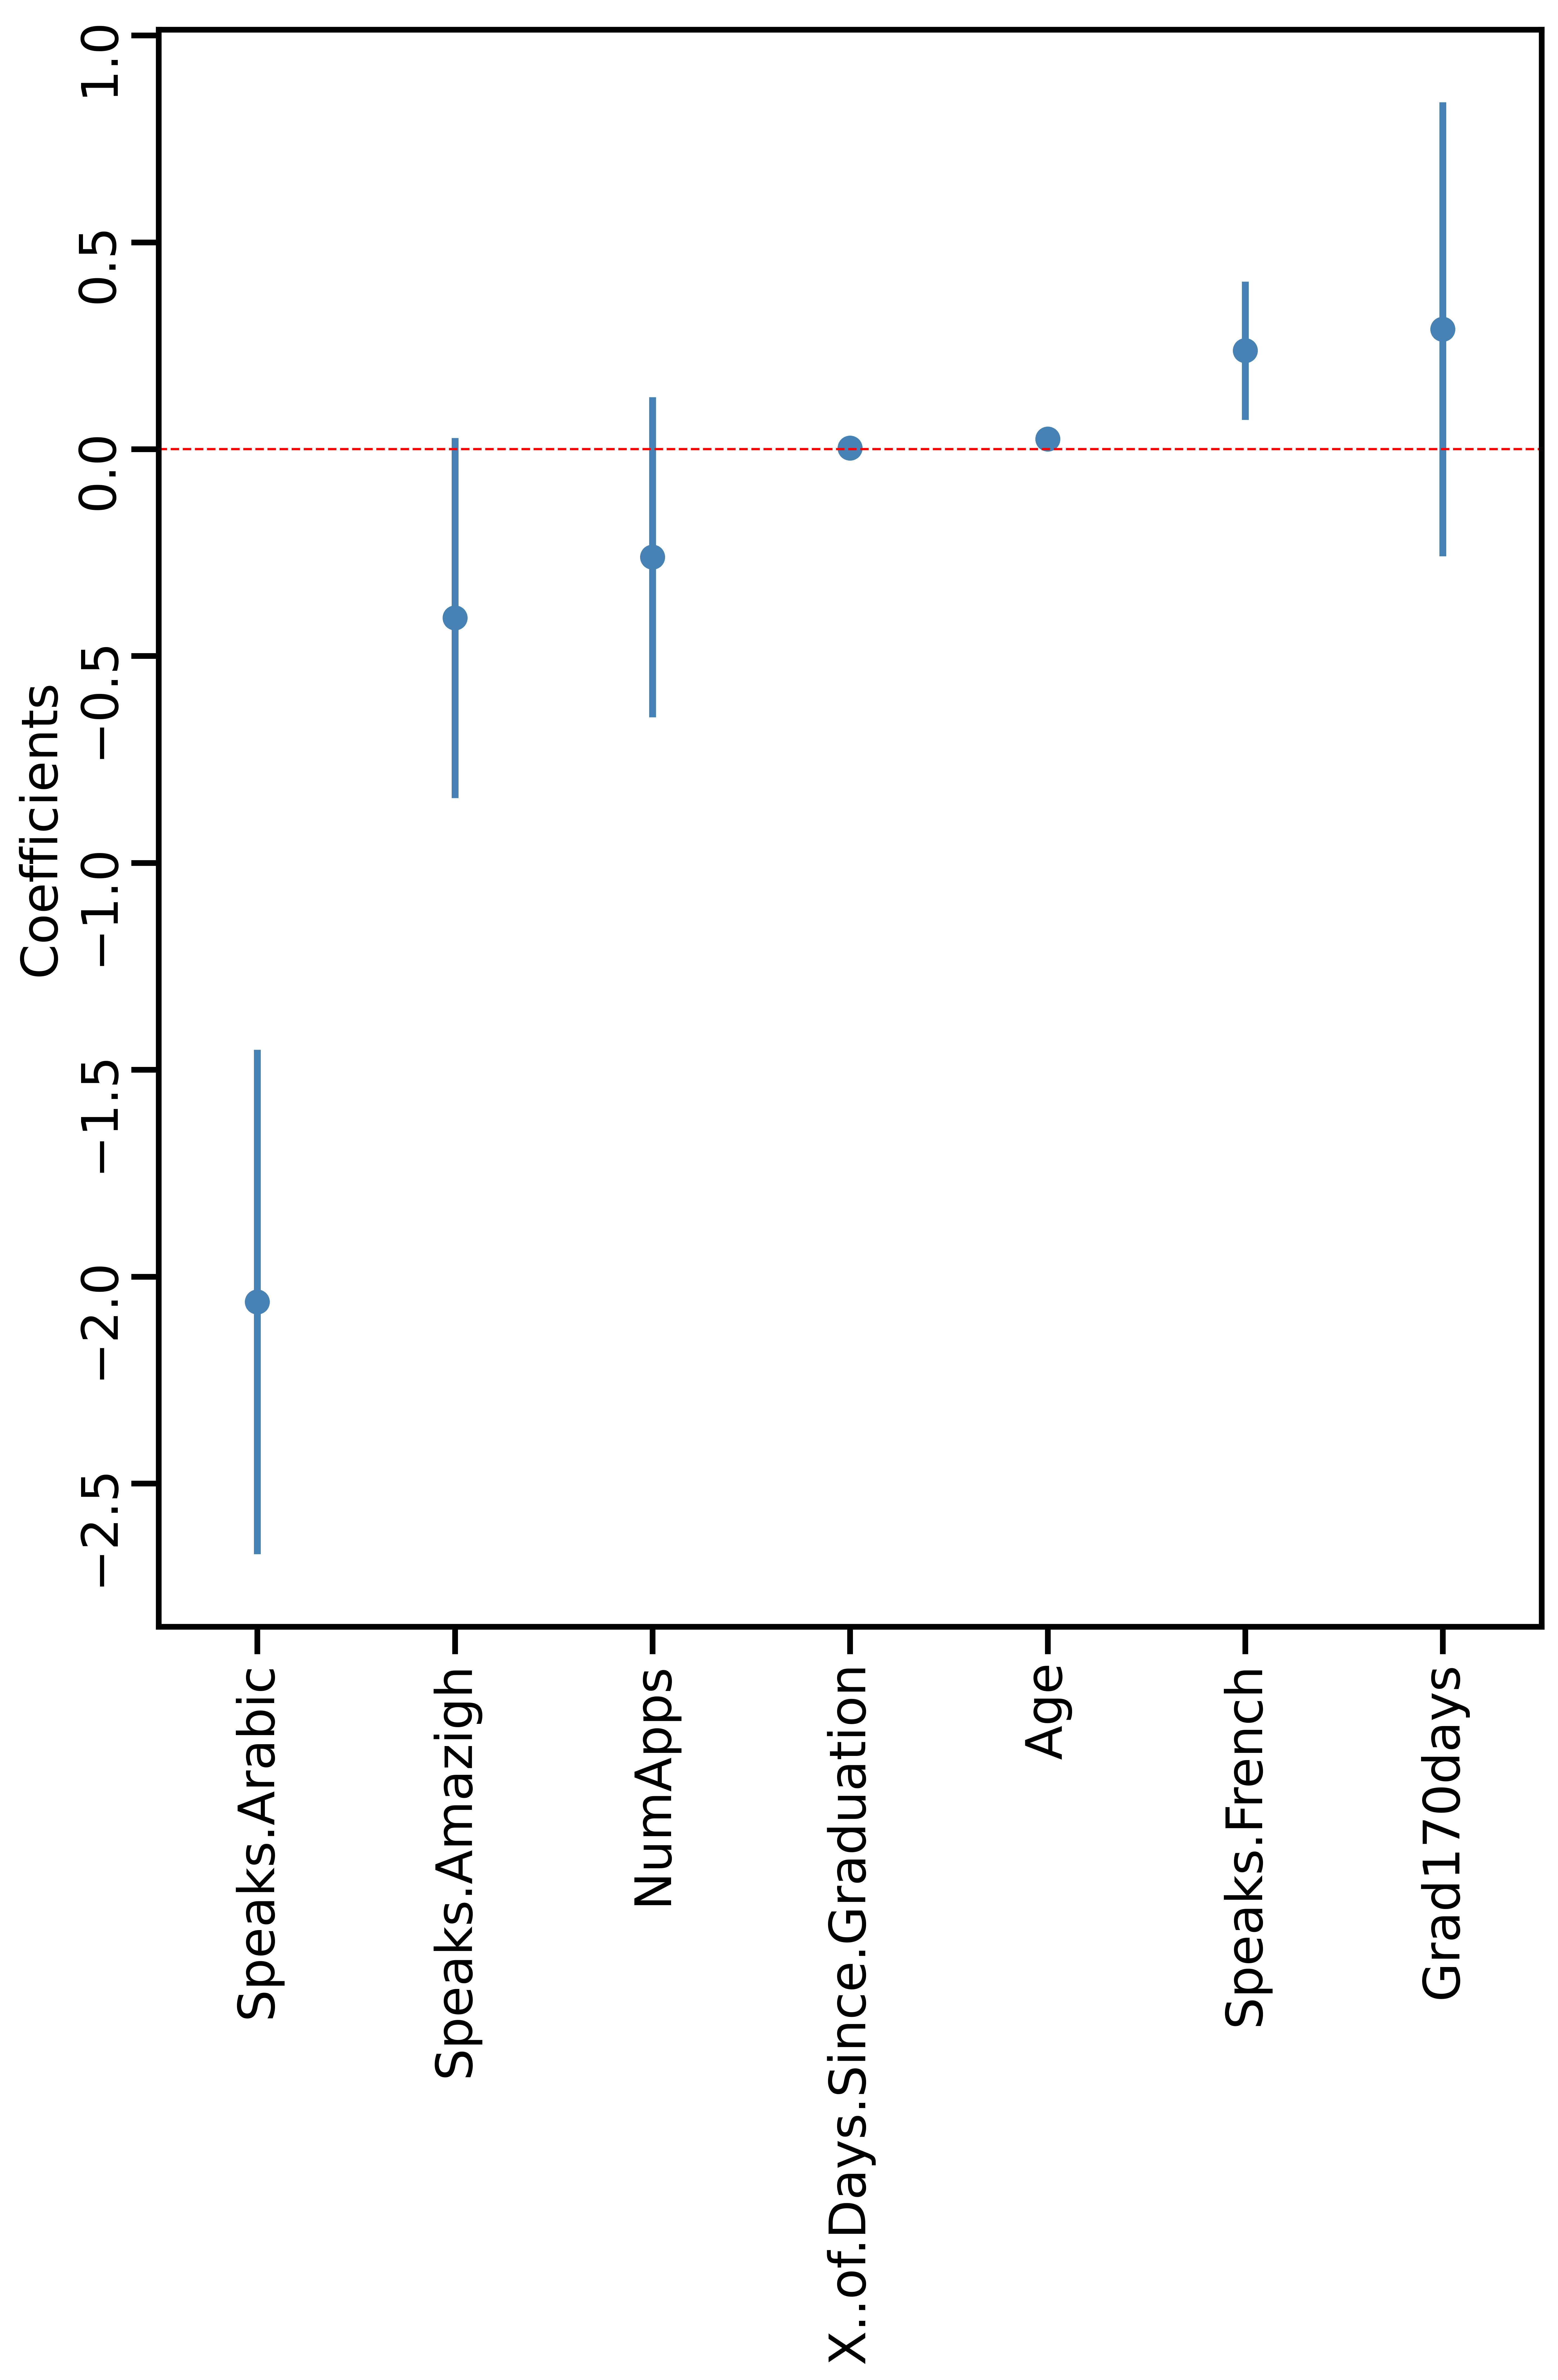

In [109]:
coefplot(log_reg)

In [30]:
y.value_counts()

0.0    1500
1.0    1429
Name: Retain6mo, dtype: int64

In [36]:
rf.fit(X, y)

RandomForestClassifier()

In [37]:
plt.rcParams['figure.dpi'] = 300

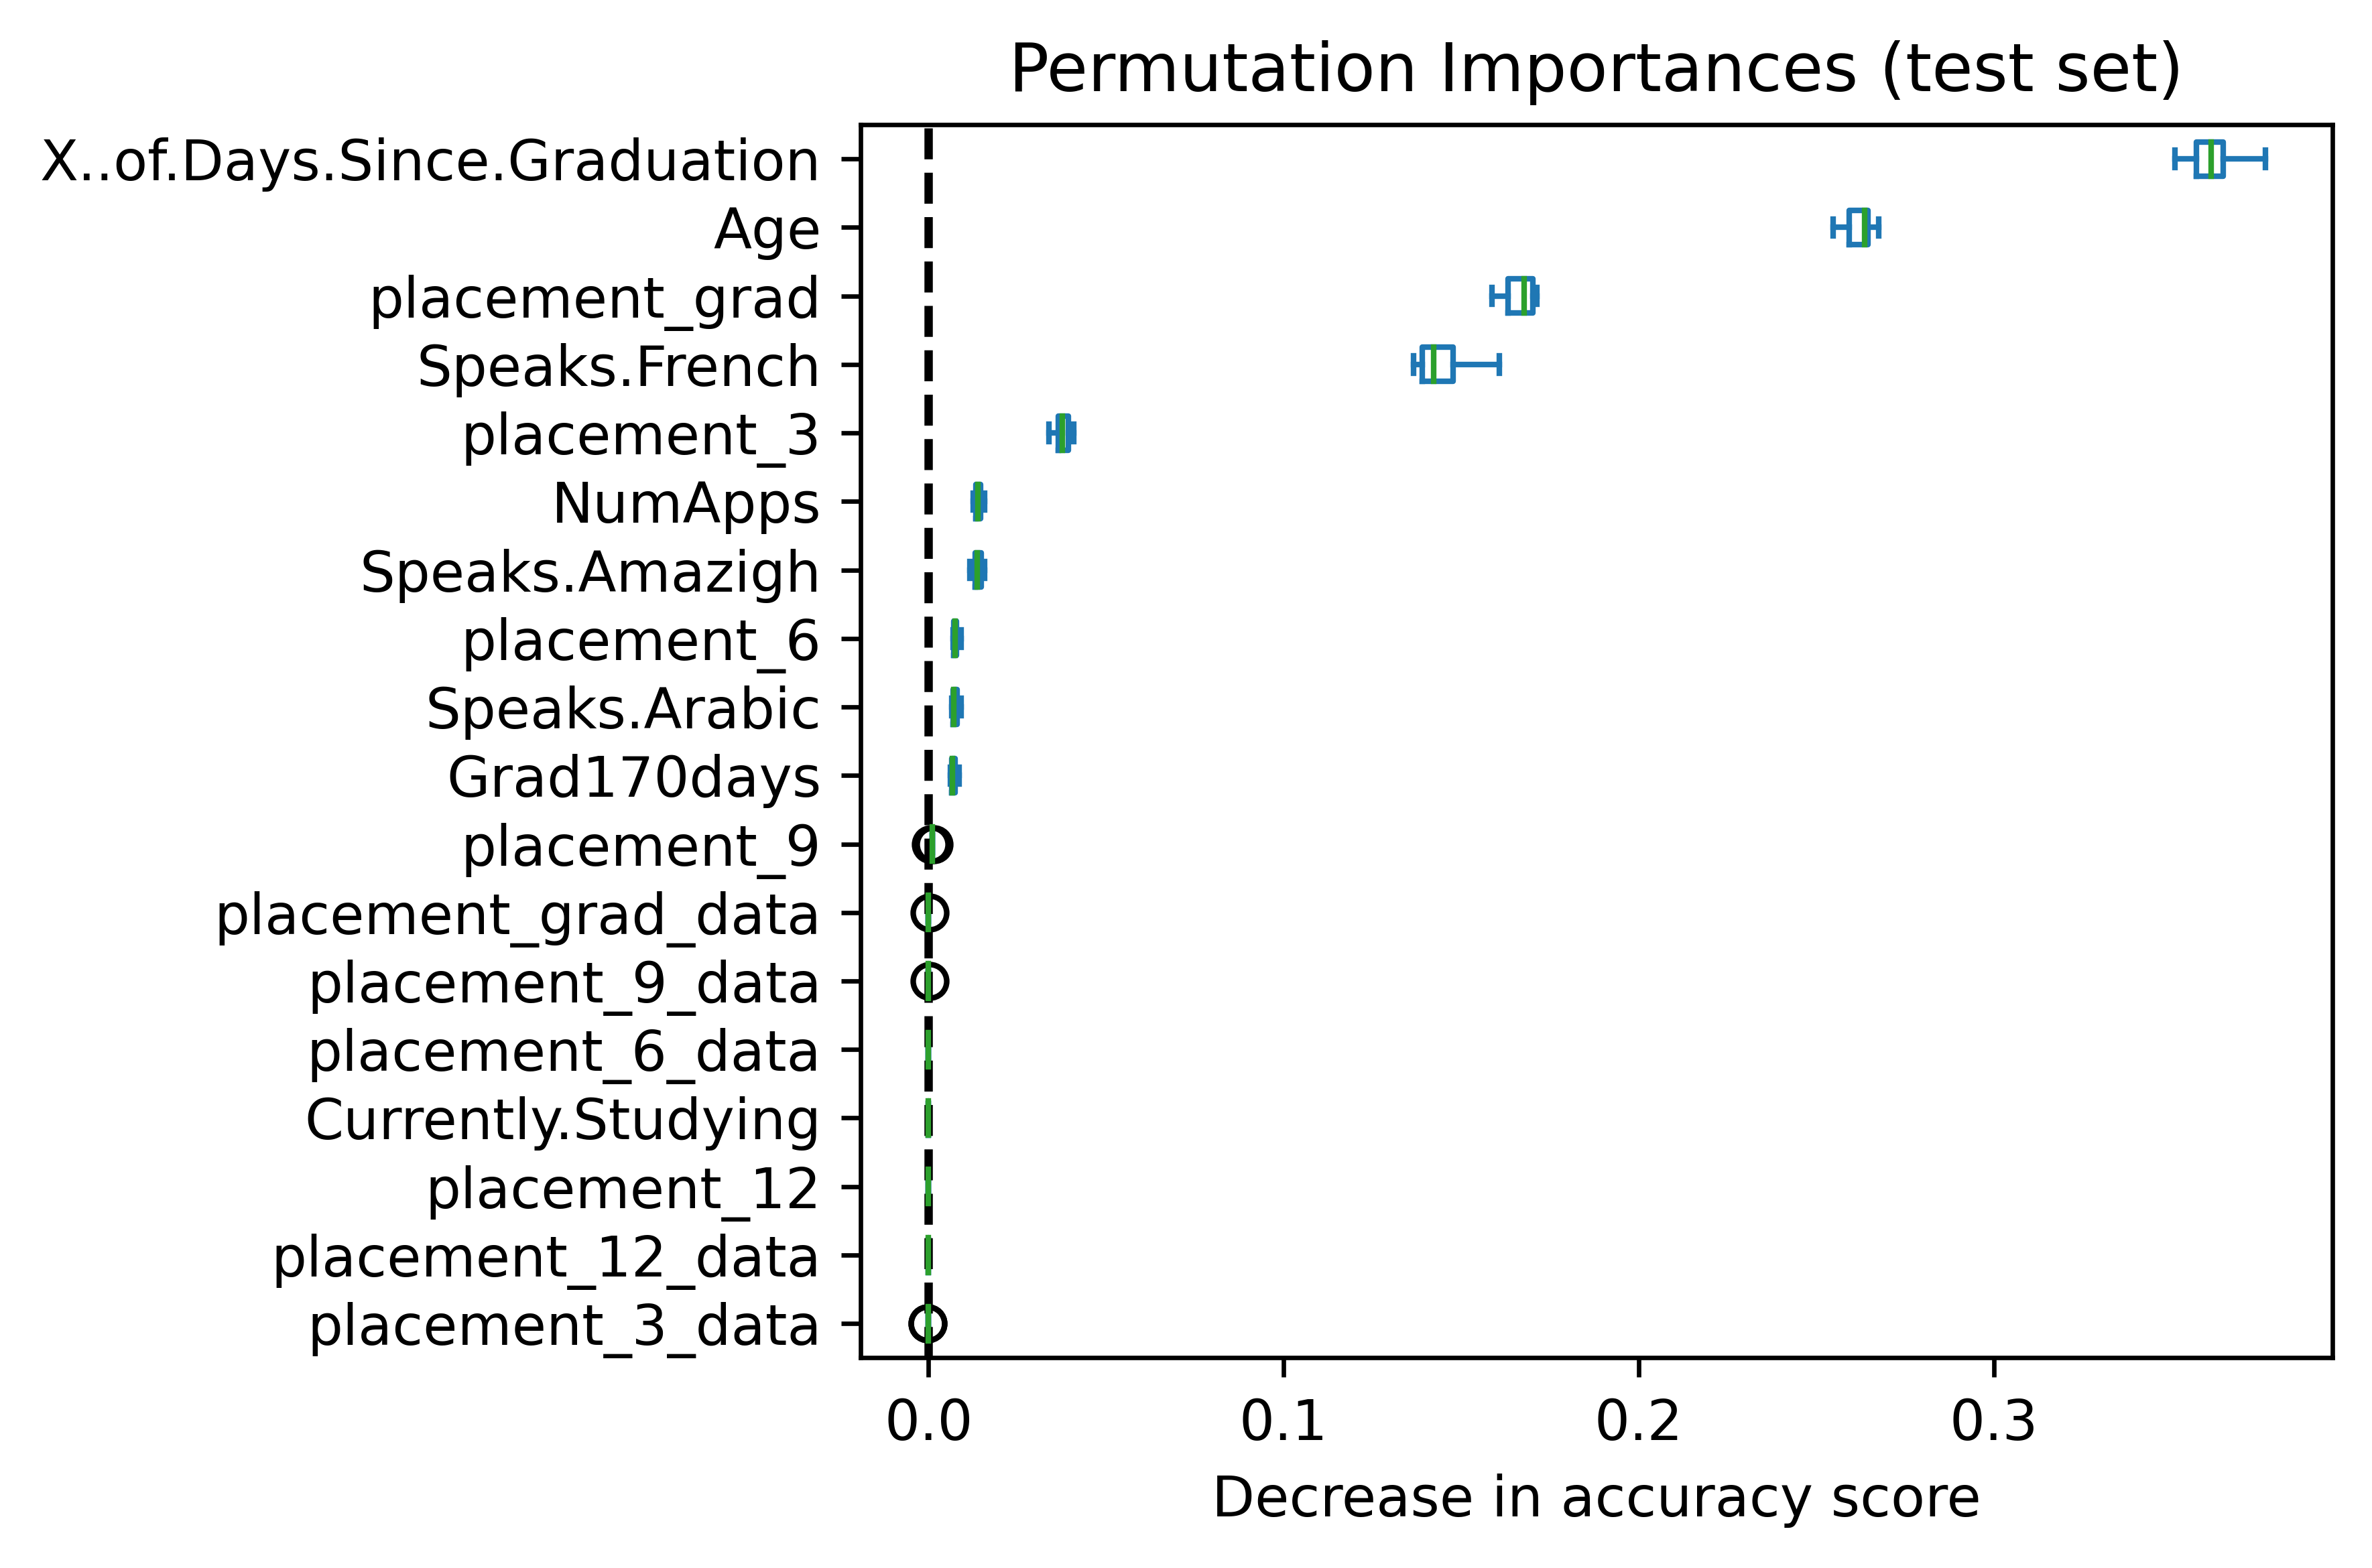

In [45]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf, X, y, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [39]:
plt.rcParams['figure.dpi'] = 600

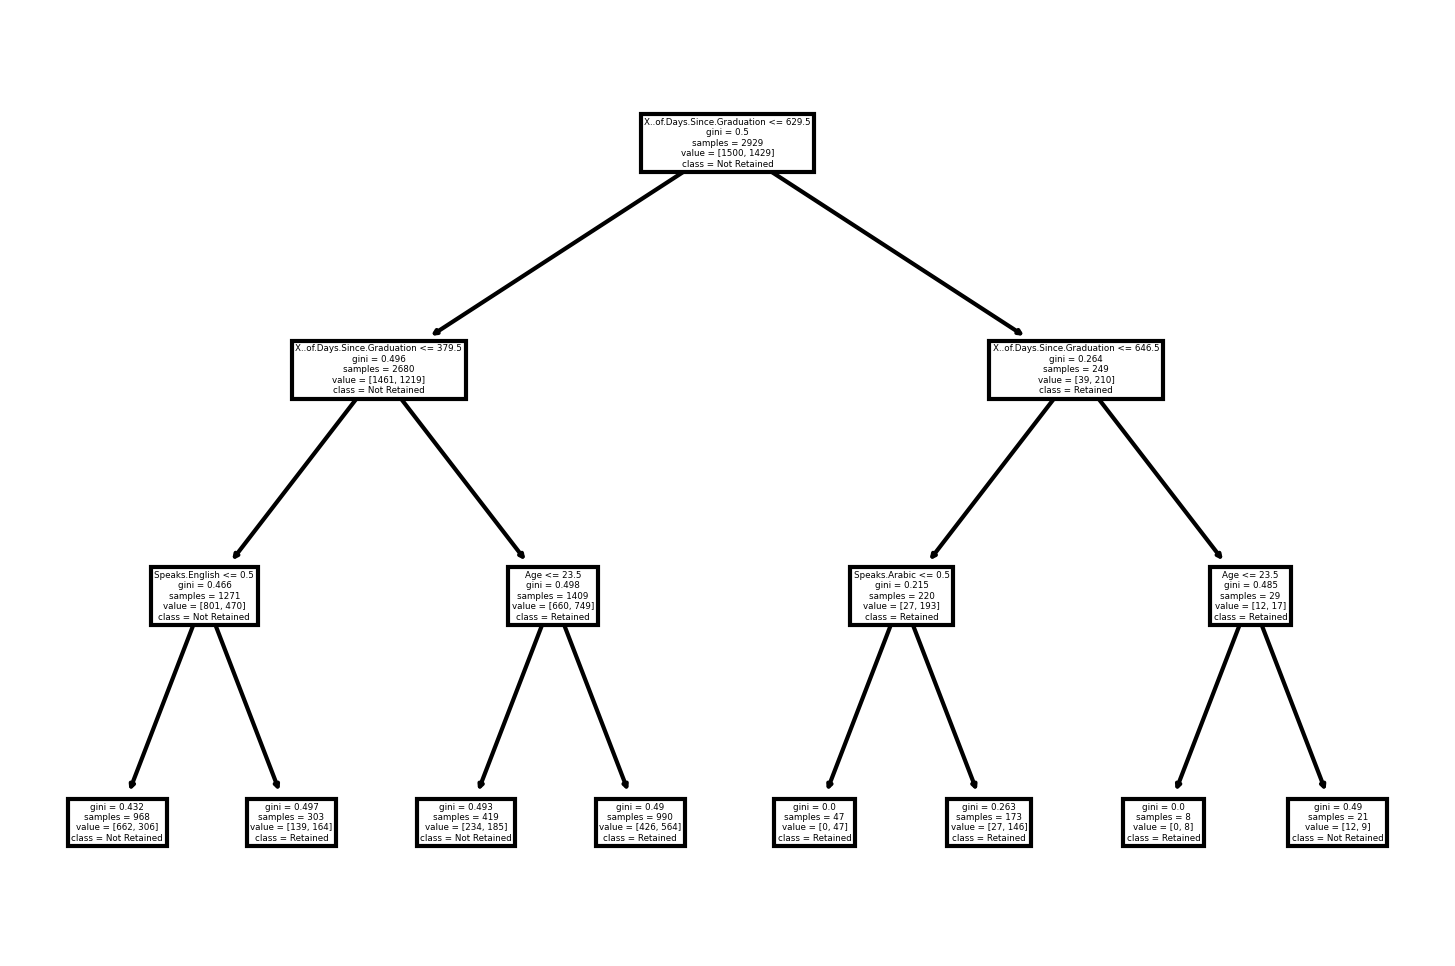

In [21]:
plot_tree(dt, feature_names=X.columns, class_names=["Not Retained", "Retained"]);